# Lab 3 - Part 1: Classification and Grid Search (33 marks)
### Due Date: Monday, March 13 at 12pm

Author: Sam Rainbow

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The purpose of this portion of the assignment is to practice following the grid-search workflow: 
- Split data into training and test set
- Use the training portion to find the best model using grid search and cross-validation
- Retrain the best model
- Evaluate the retrained model on the test set

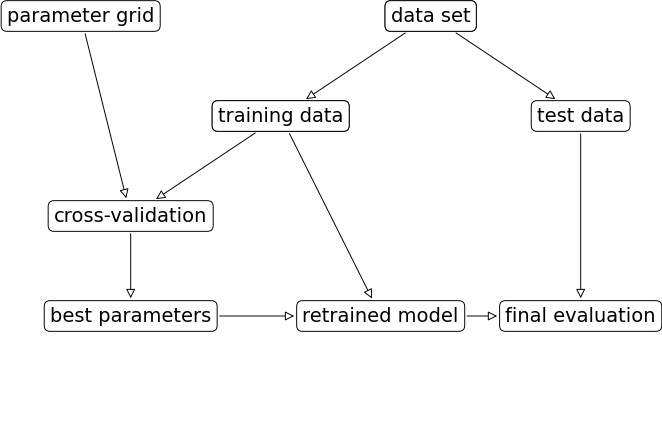

In [5]:
import mglearn
mglearn.plots.plot_grid_search_overview()

## 0. Function definitions (2 marks)

In [6]:
from sklearn.model_selection import cross_validate


def get_classifier_cv_score(model, X, y, scoring='accuracy', cv=7):
    '''Calculate train and validation scores of classifier (model) using cross-validation
        
        
        model (sklearn classifier): Classifier to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        scoring (str): a scoring string accepted by sklearn.metrics.cross_validate()
        cv (int): number of cross-validation folds see sklearn.metrics.cross_validate()
        
        returns: mean training score, mean validation score
    
    '''
    
    #TODO: Implement function body
    cv_score = cross_validate(model, X, y, cv =cv, scoring = scoring, return_train_score=True)
    train_score = cv_score['train_score'].mean()
    val_score = cv_score['test_score'].mean()

    return train_score,val_score
    

In [7]:
# DO NOT NEED TO ADD ANYTHING TO THIS FUNCTION
def print_grid_search_result(grid_search):
    '''Prints summary of best model from GridSearchCV object.
    
        For the best model of the grid search, print:
        - parameters 
        - cross-validation training score
        - cross-validation validation score 
        
        scores are printed with 3 decimal places
    
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        returns: None
        
    '''
    
    print(grid_search.best_params_)
    print("training score= {:.3f}; validation score={:.3f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_],
                                                                  grid_search.cv_results_['mean_test_score'][grid_search.best_index_]))

In [8]:
# DO NOT NEED TO ADD ANYTHING TO THIS FUNCTION
import mglearn

def plot_grid_search_results(grid_search):
    '''For grids with 2 hyperparameters, create a heatmap plot of test scores
        
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        uses mglearn.tools.heatmap() for plotting
    
    '''
    results = pd.DataFrame(grid_search.cv_results_)

    params = sorted(grid_search.param_grid.keys())
    
    assert len(params) == 2, "We can only plot two parameters."
    
    # second dimension in reshape are rows, needs to be the fast changing parameter
    scores = np.array(results.mean_test_score).reshape(len(grid_search.param_grid[params[0]]),
                                                      len(grid_search.param_grid[params[1]]))

    # plot the mean cross-validation scores
    # x-axis needs to be the fast changing parameter
    mglearn.tools.heatmap(scores, 
                          xlabel=params[1], 
                          xticklabels=grid_search.param_grid[params[1]], 
                          ylabel=params[0], 
                          yticklabels=grid_search.param_grid[params[0]],
                          cmap="viridis", fmt="%0.3f")

In [9]:
# DO NOT NEED TO ADD ANYTHING TO THIS FUNCTION
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_actual, y_pred, labels, title):
    '''Creates a heatmap plot of the confusion matrix.
    
        y_actual (pandas.DataSeries or numpy.Array): Ground truth label vector
        y_pred (pandas.DataSeries or numpy.Array): Predicted label vector
        labels (list(str)): Class names used for plotting (ticklabels)
        title (str): Plot title
        
        uses sklearn.metrics.confusion_matrix
        
    '''
    
    mat = confusion_matrix(y_actual, y_pred)

    sns.heatmap(mat, 
                xticklabels=labels,  
                yticklabels=labels, 
                square=True, annot=True, cbar=False, 
                fmt='d')
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.title(title)

## 1. Load data (2 marks)
yellowbrick mushroom  
https://www.scikit-yb.org/en/latest/api/datasets/mushroom.html




### 1.1 Prepare the feature matrix and target vector

Using the yellowbrick `load_mushroom()` function, load the mushroom data set into feature matrix `X` and target vector `y`

Print shape and type of `X`, `y`

In [10]:
# TODO: Add data loading code
import yellowbrick
from yellowbrick.datasets import load_mushroom

X,y = load_mushroom()

In [11]:
# Print the shape and type of X and y
print("Shape of X: ", X.shape, "Type of X: ", type(X))
print("Shape of y: ", y.shape, "Type of y: ", type(y))

Shape of X:  (8123, 3) Type of X:  <class 'pandas.core.frame.DataFrame'>
Shape of y:  (8123,) Type of y:  <class 'pandas.core.series.Series'>


## 2. Preprocessing (4 marks)
In this dataset, all features are discrete and nominal and need to be encoded. We will use a `OneHotEncoder`

The target vector is discrete and nominal as well and contains string labels. While sklearn is OK using string labels in target vectors, you will use a `LabelEncoder` explicitly to convert strings to integers and keep the encoder to translate between the two representations

### 2.1 Onehot encoding of features
Use `OneHotEncoder` to convert `X` into one-hot-encoded features stored in a variable `X_enc`. Use `sparse=False`. Print shape of `X_enc`

In [12]:
# TODO: Add OneHotEncoder here
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
X_enc = encoder.fit_transform(X)

print("Shape of X_enc:", X_enc.shape)

Shape of X_enc: (8123, 20)


### 2.2 Label encode target vector 
Use `LabelEncoder` to encode the target vector `y`, saved in a variable `y_enc`

Print the resulting target vector `y_enc` and print the class names available in the `classes_` attribute of the `LabelEncoder` object

In [13]:
# TODO: Add LabelEncoder here
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_enc = encoder.fit_transform(y.values.reshape(-1, 1).ravel())

print("Encoded Target Vector: ", y_enc)
print("Class Names: ", encoder.classes_)

Encoded Target Vector:  [0 0 1 ... 0 1 0]
Class Names:  ['edible' 'poisonous']


## 3. Create training and test sets (1 mark)
Using scikit-learn `train_test_split()` with parameters `random_state=37`, `test_size=0.2`, split `X_enc` and `y_enc` into training and test sets

In [14]:
from sklearn.model_selection import train_test_split
# TODO: Add train_test_split() here
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=0.2, random_state=37)

## 4. Compare models using cross-validation (4 marks)
Create a list containing `LogisticRegression()`, 
          `SVC()`,
          `BernoulliNB()`,
        `RandomForestClassifier(random_state=55)`, 
         `GradientBoostingClassifier(random_state=56)` objects.

Iterate this list, then:
- Compute the **f1 score** using `get_classifier_cv_score()` with the 7-fold cross-validation defined above with `X_train` and `y_train` as arguments
- Print the models' training and validation scores with **3 decimal places**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [25]:

# TODO: Add cross-validation comparison here
models = [LogisticRegression(), SVC(), BernoulliNB(),RandomForestClassifier(random_state=55),GradientBoostingClassifier(random_state=56)]

for model in models:
    train_score, val_score = get_classifier_cv_score(model, X_train, y_train, scoring='f1', cv=7)
    print(f"{type(model).__name__}:\n   Training Score: {train_score:.3f} \n   Validation Score: {val_score:.3f}")

LogisticRegression:
   Training Score: 0.663 
   Validation Score: 0.664
SVC:
   Training Score: 0.691 
   Validation Score: 0.678
BernoulliNB:
   Training Score: 0.614 
   Validation Score: 0.613
RandomForestClassifier:
   Training Score: 0.692 
   Validation Score: 0.678
GradientBoostingClassifier:
   Training Score: 0.702 
   Validation Score: 0.692


## 5. Hyperparameter tuning using grid search (8 marks)

The inital cross-validation above gives us an idea of how algorithms perfom using their default hyperparameters

Next, we will try and improve one model by tuning its hyperparameters using grid search

### 5.1 Grid search for RandomForestClassifier 

Perform grid search using `GridSearchCV` for the `RandomForestClassifier(n_estimators=300, random_state=55)`:

- Set the number of trees `n_estimators=300` for all evaluations
- Grid search using 7-fold cross-validation and `f1` as the scoring function 
- Note that there is a `n_jobs` parameter to run search in parallel. Setting it to the number of CPU cores  or -1 works well

Use the following hyperparameters and values:
- `'max_depth': [3, 5, 8]`
- `'max_features': [0.3, 0.5, 0.7, 0.9]`

From sklearn help:
> - max_depth: The maximum depth of the tree
> - max_features: If float, then max_features is a fraction and max(1, int(max_features * n_features)) features are considered at each split


Use the `print_grid_search_result()` and `plot_grid_search_result()` functions defined above to show the results

In [22]:
# TODO: Setup grid search for RandomForestClassifier(random_state=55)
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(n_estimators=300, random_state=55)

param_grid = {'max_depth': [3,5,8],
              'max_features': [0.3, 0.5, 0.7, 0.9]}

grid_search = GridSearchCV(rfc, param_grid, cv=7,
                          scoring='f1', n_jobs=8, return_train_score=True)


In [23]:
# TODO: Perform the grid search by calling fit() with X_train and y_train
grid_search.fit(X_train, y_train)

GridSearchCV(cv=7,
             estimator=RandomForestClassifier(n_estimators=300,
                                              random_state=55),
             n_jobs=8,
             param_grid={'max_depth': [3, 5, 8],
                         'max_features': [0.3, 0.5, 0.7, 0.9]},
             return_train_score=True, scoring='f1')

In [24]:
# TODO: Call print_grid_search_result() to print the results
print_grid_search_result(grid_search)

{'max_depth': 5, 'max_features': 0.7}
training score= 0.719; validation score=0.716


### *Question 1:* What is the validation score of the best model? Which models in Section 4 does it outperform?

*ADD YOUR ANSWER HERE*

The validation score of the best model is 0.716. It has a higher training score and validation score than all the other models in section 4.

In [29]:
results = pd.DataFrame(grid_search.cv_results_)
params = sorted(grid_search.param_grid.keys())

# second dimension in reshape are rows, needs to be the fast changing parameter
scores = np.array(results.mean_test_score).reshape(len(grid_search.param_grid[params[0]]),
                                                    len(grid_search.param_grid[params[1]]))
print(scores)

[[0.69944383 0.71577737 0.71321445 0.713546  ]
 [0.69820528 0.71232182 0.71613127 0.70895104]
 [0.66881449 0.66688515 0.66171907 0.66081213]]


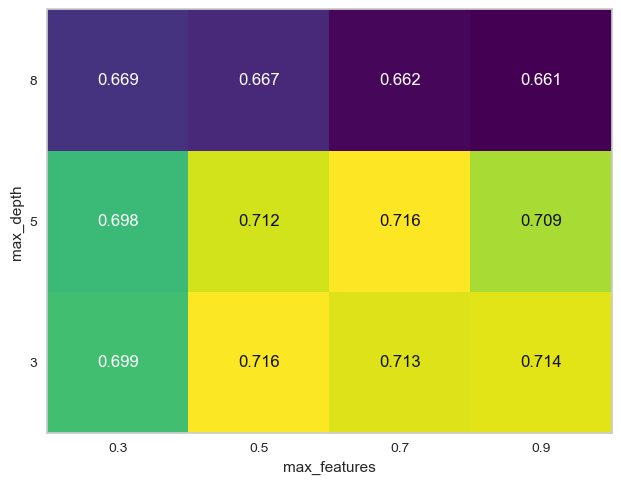

In [27]:
# TODO: Call plot_grid_search_results() to plot validation metrics for all hyperparameter combinations
plot_grid_search_results(grid_search)

### *Question 2:* Where in the hyperparameter ranges does the maximum occur? Would you need to adjust the hyperparameter ranges to find a better model?

*ADD YOUR ANSWER HERE*

The maximum occurs at max_depth=5 and max_features=0.7; somewhere between max_depth 3 and 8 with max_features between 0.5 and 0.9.

Yes, we would need to do additional hyperparameter tuning to find a better model by honing in on the ranges listed above. Although we may still be able to achieve a higher score outside of both of these ranges listed above.


## 6. Re-train best model (2 marks)
Re-train the best `RandomForestClassifier()` from the grid search above on the training dataset `X_train` and `y_train`

In [36]:
#TDOD: Re-train best random forest classifier
rfc = RandomForestClassifier(max_depth = 5, max_features = 0.7, n_estimators=300, random_state= 55)

rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, max_features=0.7, n_estimators=300,
                       random_state=55)

## 7. Evaluate using test data (4 marks)

Using the retrained model and the test dataset `X_test` and `y_test`:
- plot the confusion matrix using the `plot_confusion_matrix()` function defined above
- print the classification report

Make sure the plot has class labels and a title

### 7.1 Confusion matrix and classification report

In [39]:
print(rfc)

RandomForestClassifier(max_depth=5, max_features=0.7, n_estimators=300,
                       random_state=55)


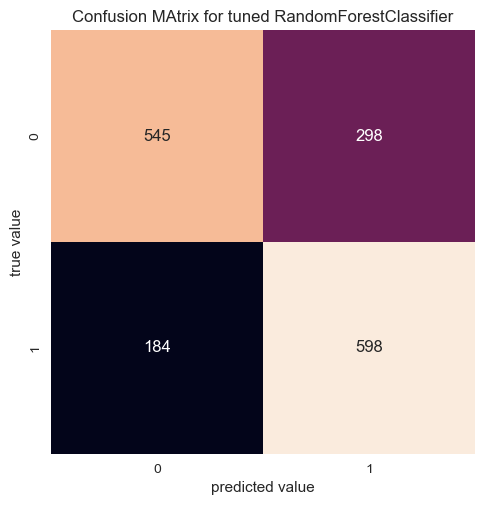

In [38]:
#TODO: call plot_confusion_matrix(), use LabelEncoder classes_ to get labels

# predict Y using the trained classifier
y_pred = rfc.predict(X_test)

# labels 
labels = list(rfc.classes_)

plot_confusion_matrix(y_test, y_pred, labels = labels, title= "Confusion MAtrix for tuned RandomForestClassifier")

### 7.2 Classification report

In [40]:
#TODO: print classification report using default threshold
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.65      0.69       843
           1       0.67      0.76      0.71       782

    accuracy                           0.70      1625
   macro avg       0.71      0.71      0.70      1625
weighted avg       0.71      0.70      0.70      1625



### *Question 3:* What are the precision, recall and accuracy for the positive class on the test set?

*ADD YOUR ANSWER HERE*

The precision, recall and accuracy for the positive class ("1" or poisonous) on the test set are as follows:

    Precision: 0.67
    Recall:    0.76
    Accuracy:  0.70


### *Question 4:* How many false negatives and false positives does the model produce on the test set?

*ADD YOUR ANSWER HERE*

The model produces 184 false negatives and 298 false positives.

## 8. Conclusion (4 marks)

In the conclusion, comment on the following items and use data to support your findings:
1. In the classification of edible vs poisonous mushrooms, what do false positive and false negative predictions imply and what are the consequences of making these mistakes?
1. In the classification of edible vs poisonous mushrooms, why is high recall desired?
1. Reflect on the usefulness of this model if it would be put into production and propose ways to improve the model and/or application

*YOUR ANSWER HERE*

1. In the context of the data the false negatives represent when a mushroom is predicted to be edible but is actually poisonous. This could result in someone erroneously eating a poisionous mushroom and becoming ill or dying. 
   False positives would imply a mushroom is poisonous but it was actually edible resulting in someone throwing away edible food which is less critical than false negatives. 

2.  High recall is desired in this case because false negatives are very dangerous (poisionous mushrooms labelled as edible). Recall is calculated by TP/(TP+FN) and since false negatives are when someone could potentially die we would like to decrease these as much as possible (TP/(TP+FN) would approach (TP/TP or 100% recall)). The tradeoff is that we should be willing to trade precision and increase the number of false positives (erroneously throw away more edible mushrooms) to avoid the more detrimental error of a false negative ( mushroom is predicted to be edible but is actually poisonous).

3. This model could most likely not be used in production since it only has a recall of 0.76, this means it still had a ~24% chance of incorrectly labelling a mushroom as edible when it is poisonous when tested on the dataset we provided. Some ways to improve the model could be testing additional models such as SVM, NB, or a Neural Network to see if we can increase the model performance. Providing the model with additional data could also increase the model performance. Similar to what we outlined in question 2. we could could decrease the decision threshold to increase precision, which would result in less false negatives(accidentally consuming poisonous mushrooms) but increase the false positive (throwing out edible mushrooms).


## 9. Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating while working on this assignment 

Can include thoughts from Lab 3-2 as well

*ADD YOUR THOUGHTS HERE*

This lab was extremely interesting since it highlights the usefulness of machine learning on something that we can all relate to... wild mushrooms. It also highlighted the importance of high recall in a relatable way (accidentally eating a poisonous mushroom). 
Additionally hypertuning a model shows how we can increase model performance.